In [10]:
import numpy as np, cv2
#from sympy.matrices import Matrix
from matplotlib import pyplot as plt
import tensorly as tl
from tensorly.decomposition import parafac

TENSOR DECOMPOSITIONS AND N-WAY DATA ARRAYS

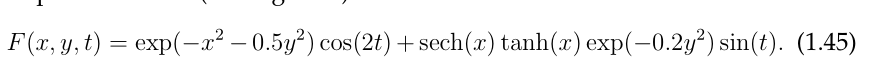



In [3]:
x = np.arange(-5,5,0.1)
y = np.arange(-6,6,0.1)
t = np.arange(0, 10*np.pi, 0.1)#;print(t)

X,Y,T = np.meshgrid(x,y,t)
A = np.exp(-(X**2 + 0.5*Y**2)) * (np.cos(2*T)) + ((1/np.cosh(X)) * np.tanh(X) * np.exp(-0.2* Y**2))*np.sin(T)
print(A.shape)

(120, 100, 315)


C:\Users\Hot Mexican\AppData\Local\Temp\ipykernel_19368\3490226350.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


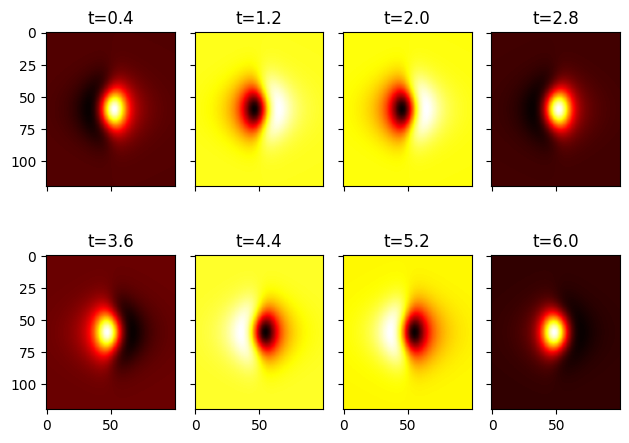

In [4]:
fig, ax = plt.subplots(2,4, layout='constrained', sharex=True, sharey=True)
ax = ax.reshape(ax.size)
dx = 8
for i,a in enumerate(ax):
    idx = 4 + i*dx
    a.imshow(A[:,:,idx], cmap='hot')
    a.set_title(f't={t[idx]:0.1f}')

plt.tight_layout()

In [5]:
tensor = tl.tensor(A)
factors = parafac(tensor, rank=2)


In [6]:
[a.shape for a in factors[1]]
#plt.plot(f[0])

[(120, 2), (100, 2), (315, 2)]

i am observing that factors are [A,B,C] and shapes of factors are [(X,rank), (Y,rank), (T,rank)] and by

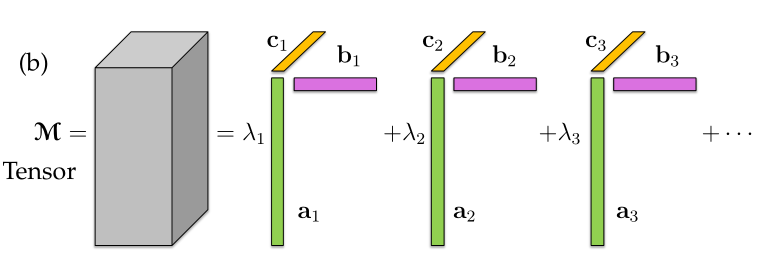

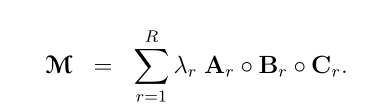

in order to reconstruct OG matrix i should add tripple outer product matrices with weights/scales (they are 1.)

so a1 = A[:,0] or A.T[0], b1 =..., c2 = C.T[1]

[1. 1.]


C:\Users\Hot Mexican\AppData\Local\Temp\ipykernel_19368\4234803747.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


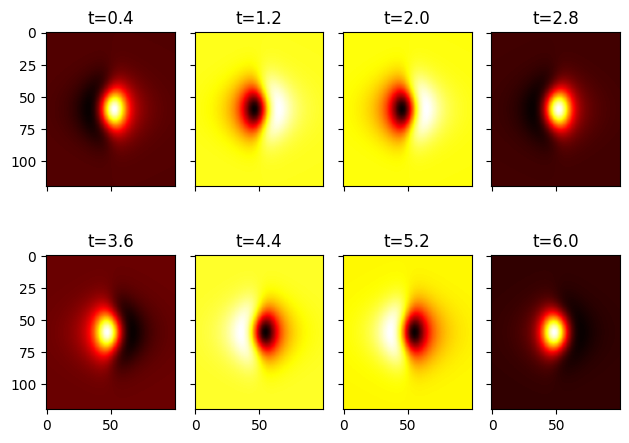

In [7]:
weights,[A,B,C] = factors;print(weights)
AT,BT,CT = A.T,B.T,C.T

M1 = np.einsum('i,j,k', AT[0], BT[0], CT[0])
M2 = np.einsum('i,j,k', AT[1], BT[1], CT[1])
A_2 = weights[0]*M1 + weights[1]*M2
fig, ax = plt.subplots(2,4, layout='constrained', sharex=True, sharey=True)
ax = ax.reshape(ax.size)
dx = 8
for i,a in enumerate(ax):
    idx = 4 + i*dx
    a.imshow(A_2[:,:,idx], cmap='hot')
    a.set_title(f't={t[idx]:0.1f}')

plt.tight_layout()

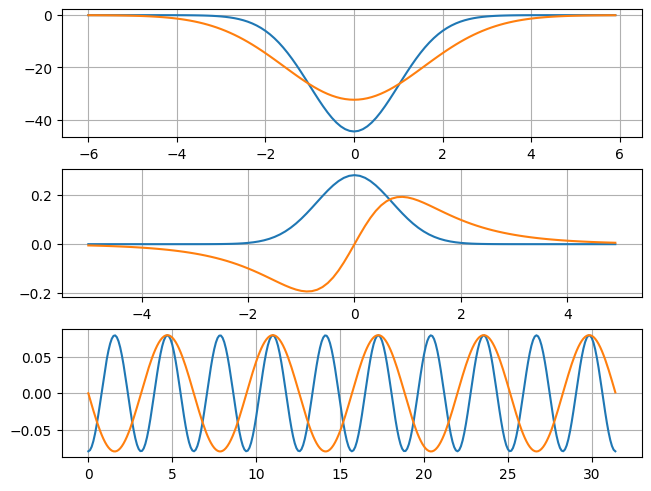

In [8]:
plt.rcParams['axes.grid'] = True
fig, ax = plt.subplots(3,1, layout='constrained')
ax = ax.reshape(ax.size)
ax[0].plot(y,AT[0],y,AT[1])
ax[1].plot(x,BT[0],x,BT[1])
ax[2].plot(t,CT[0],t,CT[1])



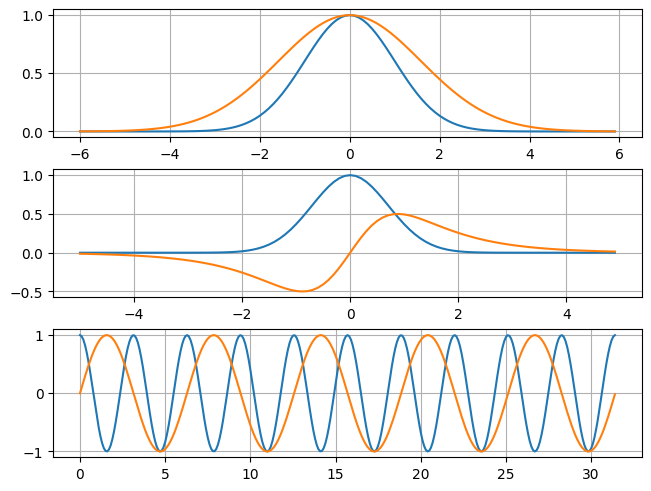

In [9]:

fig, ax = plt.subplots(3,1, layout='constrained')
ax = ax.reshape(ax.size)
ax[0].plot(y,np.exp(-0.5*y**2),y,np.exp(-0.2*y**2))
ax[1].plot(x,np.exp(-x**2),x,(1/np.cosh(x))*np.tanh(x))
ax[2].plot(t,np.cos(2*t),t,np.sin(t))